In [319]:
#I will analyze Price and volume Data for the cryptocurrency Bitcoin (BTC) in 2021.
#I have fetched the data from https://finance.yahoo.com/quote/BTC-USD/history.

#Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns

from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

In [320]:
#Let's start by importing BTC data, treating the first column as the index and parsing the dates.

df = pd.read_csv('/Users/davidgomez/Desktop/BTC Python Project Data/BTC-USD_2021_Historical_Price_Data.csv',
                 index_col=0,
                 parse_dates= True
)

df.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344,29374.152344,4.073030e+10
2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578,32127.267578,6.786542e+10
2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438,32782.023438,7.866524e+10
2021-01-04,32810.949219,33440.218750,28722.755859,31971.914063,31971.914063,8.116348e+10
2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688,33992.429688,6.754732e+10


In [321]:
#Once the Database has been successfully imported and the Dataframe (df) has been created,
#let's now explore the Dataframe.

df.describe() #having a look at the basic statistics of the DataFrame.
df.shape
df.info()

#The Dataframe contains 366 rows and 6 columns. The info() function appears to indicate there are 4 missing
#values. Let's verify this.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2021-01-01 to 2022-01-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       362 non-null    float64
 1   High       362 non-null    float64
 2   Low        362 non-null    float64
 3   Close      362 non-null    float64
 4   Adj Close  362 non-null    float64
 5   Volume     362 non-null    float64
dtypes: float64(6)
memory usage: 20.0 KB


In [323]:
# Let's find out the maximum and minimum close price in 2021.

maxprice = df['Close'][df['Close'] == max(df.Close)]
print(maxprice[-1])

minprice = df['Close'][df['Close'] == min(df.Close)]
print(minprice[-1])


67566.828125
29374.152344


In [325]:
#Let's now calculate the annualized returns for the given period.
#First, let's get the Bitcoin prices for the start and end of the period.

start = df['Close'].head(1)
end = df['Close'].tail(1)
print(start,end)

Date
2021-01-01    29374.152344
Name: Close, dtype: float64 Date
2022-01-01    47686.8125
Name: Close, dtype: float64


In [326]:
#Calculating the total returns.

total_return = (end[-1]-start[-1])/start[-1]
print(total_return)

0.623427697301385


In [328]:
#Writing a function to calculate the number of periods (N)

def diff_month(d1, d2):
    return (d1.year - d2.year) * 12 + d1.month - d2.month

d1 = datetime(2021,1,1)  
d2 = datetime(2022,1,1) 

print(diff_month(d2, d1))


12


In [329]:
#Let's put this all together to find the annualized return.
N = 12
annualized_return = ((1+ total_return)**(12/N))-1
print(annualized_return)

#Bitcoin reached 62.34% return in 2021.

0.623427697301385


In [330]:
df.isnull().values.any() #There are null values. Let's now identify these.

True

<AxesSubplot:xlabel='Date'>

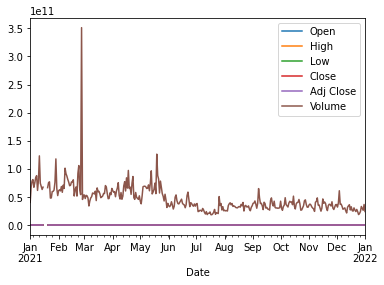

In [331]:
df.plot() #There seems to be a discontinuity of values in mid-January. Let's zoom in those dates.

<AxesSubplot:xlabel='Date'>

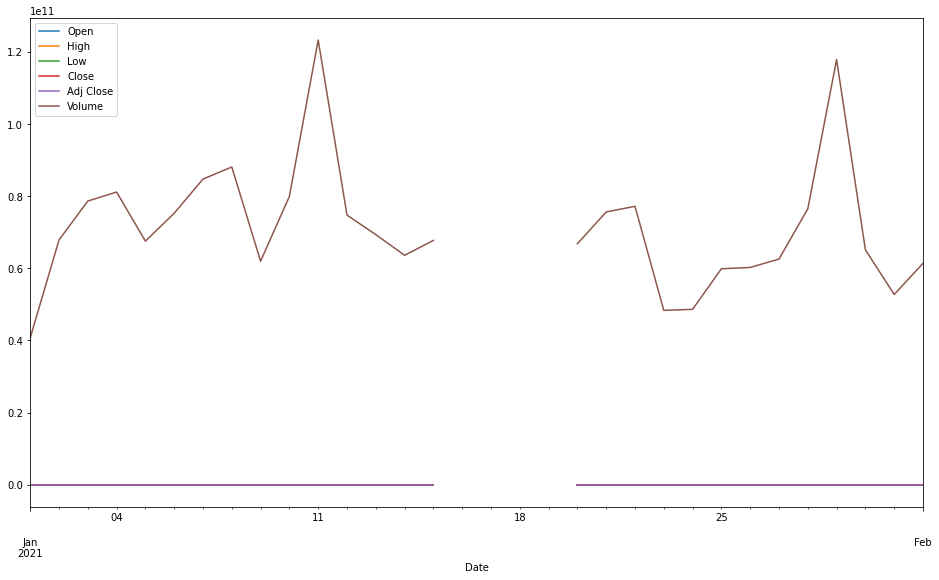

In [332]:
df.loc['2021-01-01' : '2021-02-01'].plot(figsize=(16,9)) #it's clear now that there is missing data
#between January,15 and January,19. Let's handle this.

In [333]:
#I could either choose to drop the rows with missing values or to fill them with. In this case,
#we could benefit from those values. We could presume that the values stayed the same and use previous values
#to fill the blanks forward. I will also make the changes permanent.

df.loc['2021-01-15': '2021-01-19'] = df.loc['2021-01-15': '2021-01-19'].fillna(method='ffill')


<AxesSubplot:xlabel='Date'>

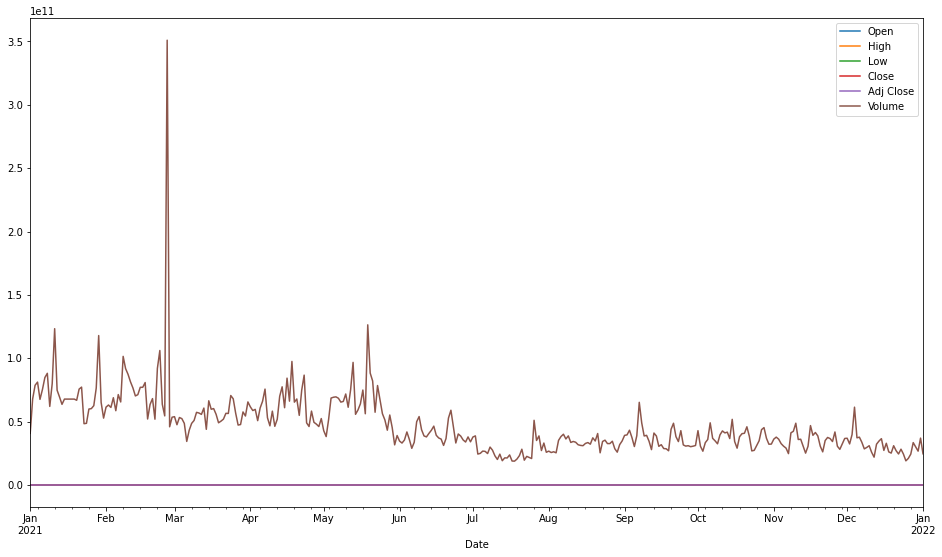

In [334]:
df.plot(figsize=(16,9)) #no discontinuities of values observed. The nulls have been handled.


In [335]:
#Let's now rename the 'Adj Close' as 'Price' to make it more intuitive.

df = df.rename(columns={'Adj Close':'Price'})
df.head()

,Open,High,Low,Close,Price,Volume
Date,,,,,,
2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344,29374.152344,4.073030e+10
2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578,32127.267578,6.786542e+10
2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438,32782.023438,7.866524e+10
2021-01-04,32810.949219,33440.218750,28722.755859,31971.914063,31971.914063,8.116348e+10
2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688,33992.429688,6.754732e+10


In [336]:
#We will now drop the 'Open', 'Close, 'High', and 'Low' columns
#and will take the 'Adj Close' column as representative of the daily price of BTC.

df = df.drop(columns=['Open','High','Low','Close'])
df.head()


,Price,Volume
Date,,
2021-01-01,29374.152344,4.073030e+10
2021-01-02,32127.267578,6.786542e+10
2021-01-03,32782.023438,7.866524e+10
2021-01-04,31971.914063,8.116348e+10
2021-01-05,33992.429688,6.754732e+10


In [338]:
#Calculating the daily and weekly returns of Bitcoin.

df['Daily_returns'] = df['Price'].pct_change()

df['Weekly_returns'] = df['Price'].pct_change(periods=7)

df.tail()

,Price,Volume,Daily_returns,Weekly_returns
Date,,,,
2021-12-28,47588.855469,3.343038e+10,-0.060259,-0.027541
2021-12-29,46444.710938,3.004923e+10,-0.024042,-0.044908
2021-12-30,47178.125000,2.668649e+10,0.015791,-0.071014
2021-12-31,46306.445313,3.697417e+10,-0.018476,-0.088854
2022-01-01,47686.812500,2.458267e+10,0.029809,-0.054393


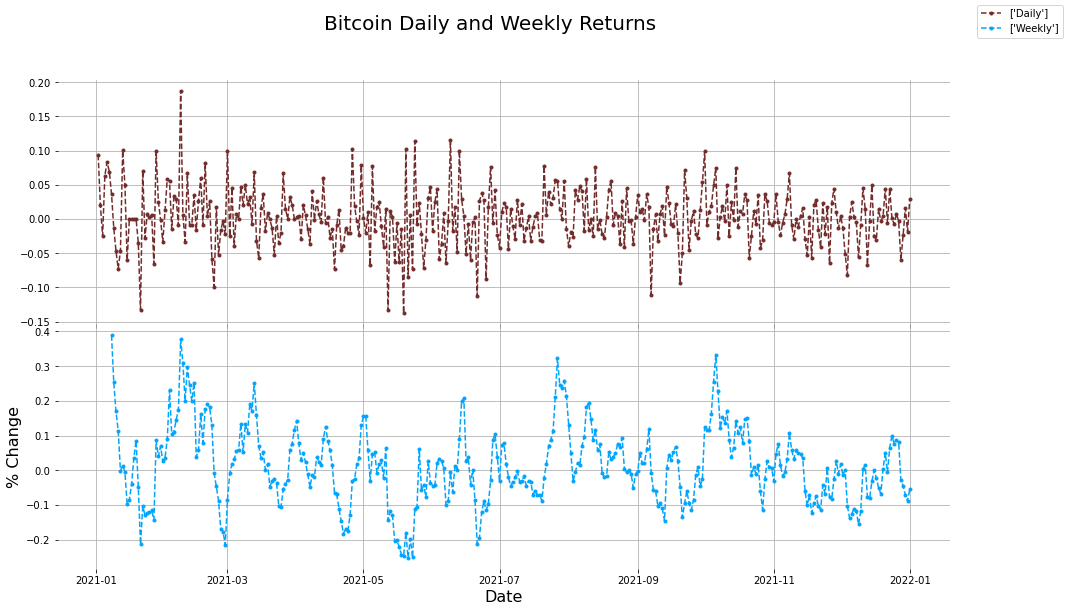

In [340]:
# Visualizing the daily and weekly returns of Bitcoin in 2021.

fig, (ax1,ax2) = plt.subplots(nrows=2, figsize =(16,9), sharex=True, subplot_kw=dict(frameon=False)) # frameon=False removes frames

plt.subplots_adjust(hspace=.0)
ax1.grid()
ax2.grid()

Daily = ax1.plot(df['Daily_returns'],color='#732C2C', linestyle='--', marker='.', label= ['Daily'])
Weekly = ax2.plot(df['Weekly_returns'],color='#03A5FC', linestyle='--', marker='.', label= ['Weekly'])
fig.suptitle('Bitcoin Daily and Weekly Returns', fontsize= 20)
plt.ylabel('% Change', fontsize=16)
plt.xlabel('Date', fontsize=16)
fig.legend()



<AxesSubplot:xlabel='Price', ylabel='Volume'>

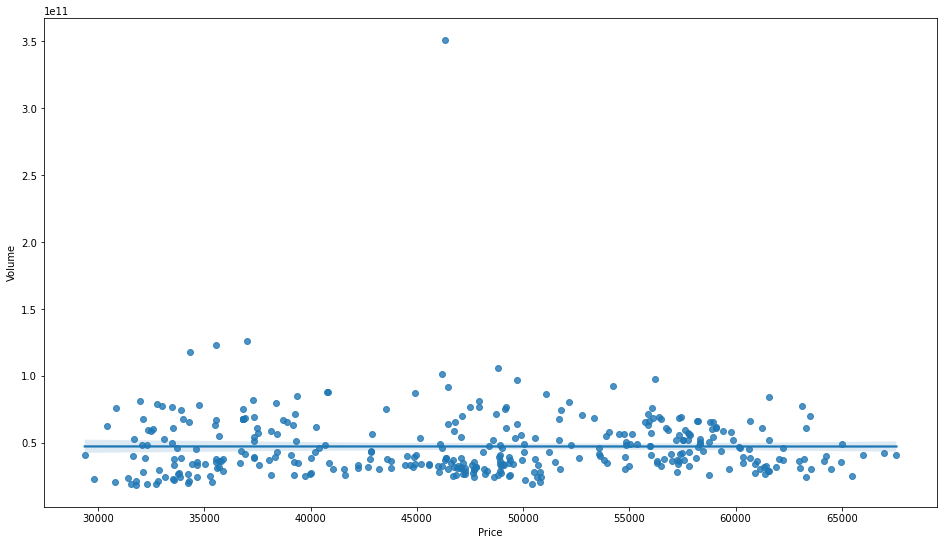

In [243]:
#Let's now study the relationship between the Price and Trading Volume of Bitcoin.
#To do so, let's build a Scatterplot using Seaborn to visualize the relationship 
#between the Price and Volume of BTC.

fig, ax = plt.subplots(figsize = (16,9))
sns.regplot(x='Price', y='Volume', data=df, ax=ax)


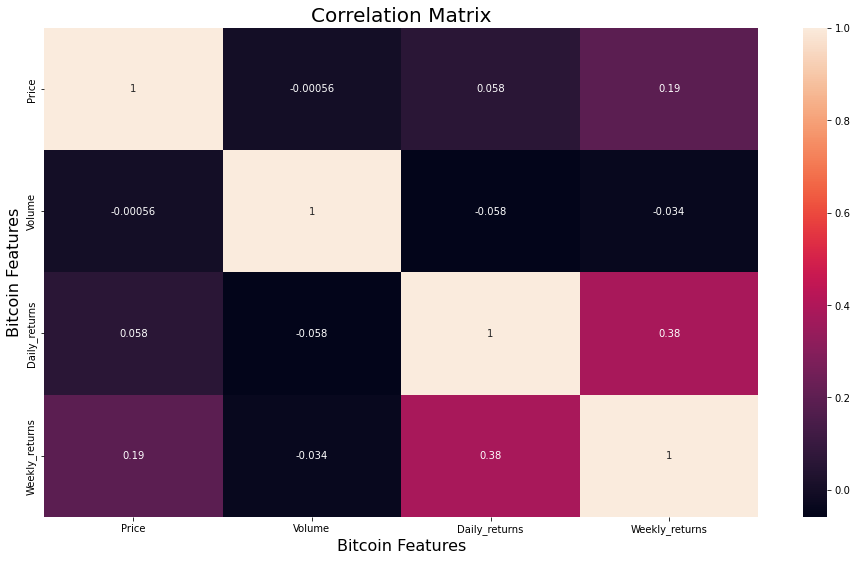

In [244]:
# Let's now build a correlation matrix to quantify the correlation between variables.

correlation_matrix = df.corr(method='pearson')
plt.figure(figsize = (16,9))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix', fontsize= 20)
plt.xlabel('Bitcoin Features', fontsize= 16)
plt.ylabel('Bitcoin Features',fontsize= 16)
plt.show()


In [245]:
#There does not seem to be a relationship between the two variables. Let's calculate the Pearson's
#Correlation Coefficient to verify this.

r, p = scipy.stats.pearsonr(df['Price'],df['Volume'])
print(r)

#After obtaining a value of r of -0.00056, we can confirm what we thought, there is a very weak, almost inexistent,
#linear relationship between the Price and Volume of BTC.

-0.0005585000242199489


In [246]:
#Let's now analyze the central tendency of the BTC Price.

round(df['Price'].mean(),2)     #Calculate the mean, rounded to two decimals.



47444.81

In [247]:
round(df['Price'].median(),2)   #Calculate the median, rounded to two decimals.

47747.42

In [248]:
#Both the mean (47,444.81) and the median (47,747.42) are close together. Thus, we can conclude that the data
#follows a somewhat symmetrical distribution in 2021.

<AxesSubplot:ylabel='Frequency'>

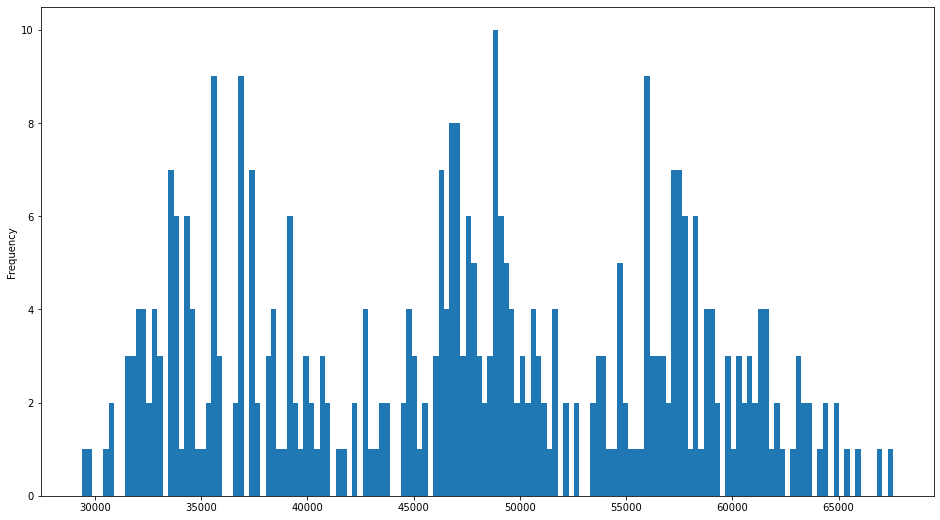

In [249]:
df['Price'].plot(kind= 'hist', bins=150, figsize=(16,9)) #Visualizing the distribution with a histogram.


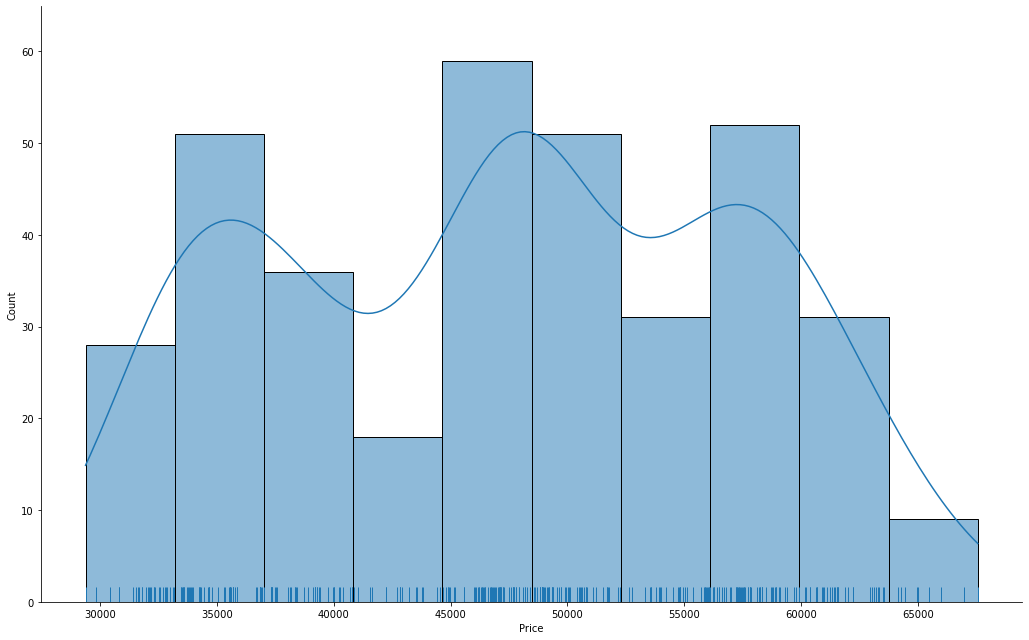

In [250]:
#Visualizing a histogram using Seaborn, that plots a histogram,
#a Kernel Density Estimate (KDE) plot and a rugplot.

sns.displot(df['Price'], rug=True, kde=True,height=9, aspect=1.6)


In [251]:
#Analytical Analysis of invalid values.

#I will analyze those values that seem invalid. I will use IQRs (InterQuartile Range), as this is not
#so sensitive to outliers.

iqr = df['Price'].quantile(.75) - df['Price'].quantile(.25)
iqr #IQR equals 17,837.61 USD.

17837.61035175

In [252]:
#Let's now calculate the Z scores, both above and below the mean.

upper_limit = df['Price'].mean() + 2 * iqr
lower_limit = df['Price'].mean() - 2 * iqr
print(upper_limit)
print(lower_limit)

83120.02718413383
11769.585777133812


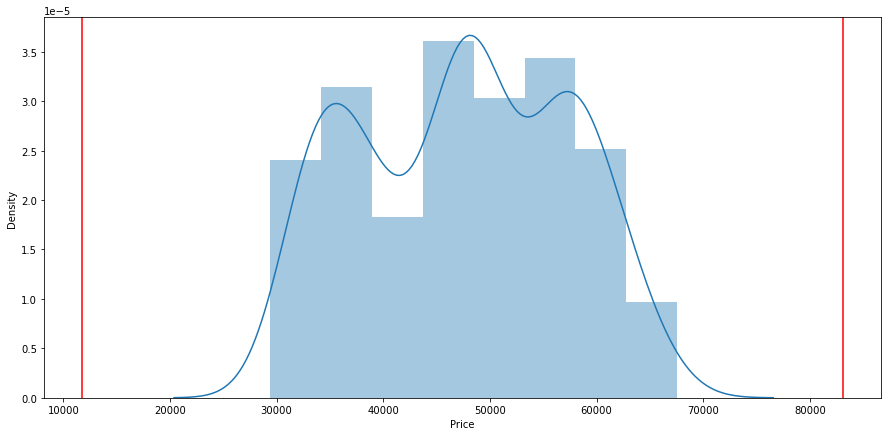

In [253]:
#Let's plot the lower and upper limit as vertical lines in the Seaborn chart.

fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(df['Price'], ax=ax)
ax.axvline(lower_limit, color='red')
ax.axvline(upper_limit, color='red')


In [254]:
#According to the plot, anything above 83,120 USD and below 11,769.6 are considered invalid values.